In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('mushroom.csv')

In [3]:
df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [4]:
df.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [5]:
df.shape

(2000, 26)

In [6]:
df.size

52000

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [8]:
df.describe()

,Unnamed: 0,stalk_height,cap_diameter
count,2000.000000,2000.000000,2000.000000
mean,624.974000,8.449118,12.314345
std,375.091938,3.697217,7.048845
min,0.000000,2.000000,1.000000
25%,290.000000,5.291009,5.723521
50%,607.000000,8.318596,12.124902
75%,957.250000,11.781272,18.698606
max,1279.000000,15.095066,25.000054


In [9]:
df.isnull().sum()

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

In [10]:
df.duplicated().sum()

1024

In [11]:
df1=df.drop_duplicates(ignore_index=True)

In [12]:
df1.columns

Index(['Unnamed: 0', 'cap_shape', 'cap_surface', 'cap_color', 'bruises',
       'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class',
       'stalk_height', 'cap_diameter'],
      dtype='object')

In [13]:
df1[['stalk_height','cap_diameter']].corr()

,stalk_height,cap_diameter
stalk_height,1.000000,-0.034891
cap_diameter,-0.034891,1.000000


<Axes: >

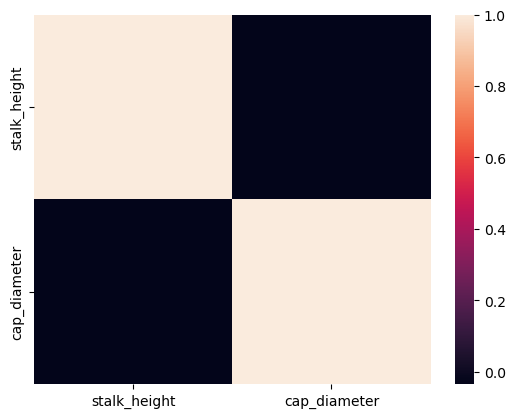

In [14]:
sns.heatmap(df1[['stalk_height','cap_diameter']].corr())

In [15]:
df2=df1.drop('Unnamed: 0',axis=1)

In [16]:
df2['class'].value_counts()

poisonous    618
edible       358
Name: class, dtype: int64

In [17]:
std_scaler=StandardScaler()

In [18]:
df2[['stalk_height']]=std_scaler.fit_transform(df2[['stalk_height']])
df2[['cap_diameter']]=std_scaler.fit_transform(df2[['cap_diameter']])

In [19]:
lab_encoder=LabelEncoder()

In [20]:
df2['class']=lab_encoder.fit_transform(df2[['class']])

In [21]:
df2

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,...,partial,brown,two,sheathing,chocolate,clustered,waste,1,1.553976,-1.080201
1,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,enlarging,...,universal,brown,two,sheathing,brown,numerous,waste,0,-1.235285,0.926435
2,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,tapering,...,universal,yellow,two,sheathing,purple,abundant,waste,1,0.143086,-0.772204
3,bell,scaly,pink,yes,fishy,notched,close,broad,orange,enlarging,...,partial,yellow,two,cobwebby,green,clustered,grasses,1,-0.891126,1.193403
4,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,enlarging,...,universal,white,none,none,yellow,clustered,urban,1,1.489498,-0.007635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,conical,grooves,brown,no,foul,notched,crowded,broad,chocolate,tapering,...,universal,brown,none,large,brown,numerous,paths,0,1.214741,-0.373102
972,bell,grooves,pink,yes,anise,descending,distant,broad,brown,enlarging,...,partial,brown,two,pendant,yellow,numerous,grasses,1,-1.289624,0.897769
973,sunken,smooth,purple,yes,anise,descending,crowded,narrow,buff,tapering,...,universal,orange,two,none,orange,abundant,grasses,0,1.245391,0.449841
974,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,tapering,...,partial,white,one,zone,yellow,numerous,waste,1,-0.546816,0.129361


In [22]:
target=df2['class']

In [23]:
features=df2.drop('class',axis=1)

In [24]:
features=pd.get_dummies(features,dtype='int')

In [25]:
features

,stalk_height,cap_diameter,cap_shape_bell,cap_shape_conical,cap_shape_convex,cap_shape_flat,cap_shape_sunken,cap_surface_fibrous,cap_surface_grooves,cap_surface_scaly,...,population_scattered,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,1.553976,-1.080201,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,-1.235285,0.926435,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0.143086,-0.772204,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,-0.891126,1.193403,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,1.489498,-0.007635,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,1.214741,-0.373102,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
972,-1.289624,0.897769,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
973,1.245391,0.449841,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
974,-0.546816,0.129361,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [26]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.8,random_state=100)

In [27]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(780, 126)
(780,)
(196, 126)
(196,)


In [51]:
svc=SVC(C=1.0,kernel='rbf',gamma=0.3)

In [52]:
svc.fit(x_train,y_train)

SVC(gamma=0.3)

In [53]:
y_pred=svc.predict(x_test)

In [54]:
accuracy_score(y_test,y_pred)

0.6071428571428571

In [55]:
svc1=SVC(C=1.0,kernel='linear',gamma=0.2)

In [56]:
svc1.fit(x_train,y_train)

SVC(gamma=0.2, kernel='linear')

In [57]:
y_pred=svc1.predict(x_test)

In [58]:
accuracy_score(y_test,y_pred)

0.576530612244898

In [36]:
params={'C':[1,2,3,4,5,6],'kernel':['linear','poly','rbf','sigmoid'],'gamma':[0.1,0.2,0.3,0.4]}

In [37]:
grid_search=GridSearchCV(svc,params,verbose=2)

In [38]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   1.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.8s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.7s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.6s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.8s
[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=   0.3s
[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=   0.3s
[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=   0.3s
[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=   0.3s
[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=   0.3s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.6s
[CV] END .........................C=1, gamma=0.

GridSearchCV(estimator=SVC(gamma=0.2),
             param_grid={'C': [1, 2, 3, 4, 5, 6], 'gamma': [0.1, 0.2, 0.3, 0.4],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=2)

In [39]:
grid_search.best_params_

{'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}

In [59]:
svc2=SVC(C=1.0,kernel='rbf',gamma=0.2)

In [60]:
svc2.fit(x_train,y_train)

SVC(gamma=0.2)

In [61]:
y_pred=svc2.predict(x_test)

In [62]:
accuracy_score(y_test,y_pred)

0.6071428571428571